In [27]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans


In [28]:
X = np.array([[1,2],
            [1.5,1.8],
            [5,8],
            [8,8],
            [1,0.6],
            [9,11]])

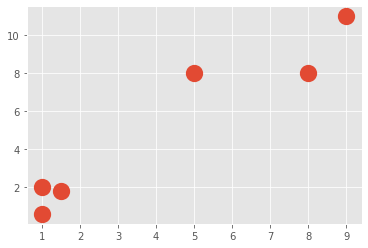

In [29]:
plt.scatter(X[:,0], X[:,1], s=150, linewidths=5)

In [30]:
clf = KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = ["g.", "r.", "b.", "k.", "c.", "o."]

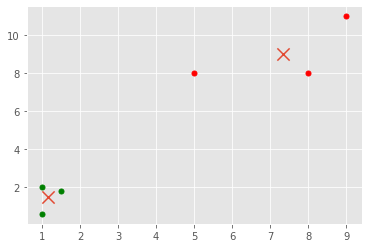

In [31]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
  
plt.scatter(centroids[:,0], centroids[:,1], marker="x", s=150, linewidths=5)
plt.show()

In [32]:
!curl -o titanic.xls https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277k  100  277k    0     0   152k      0  0:00:01  0:00:01 --:--:--  152k


In [33]:
!ls -lrt

total 284
drwxr-xr-x 1 root root   4096 Sep 28 16:35 sample_data
-rw-r--r-- 1 root root 284160 Oct  2 05:04 titanic.xls


In [34]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [35]:
pd.__version__

'1.1.2'

In [36]:
df = pd.read_excel('titanic.xls')

In [37]:
print(df.head())

   pclass  survived  ...   body                        home.dest
0       1         1  ...    NaN                     St Louis, MO
1       1         1  ...    NaN  Montreal, PQ / Chesterville, ON
2       1         0  ...    NaN  Montreal, PQ / Chesterville, ON
3       1         0  ...  135.0  Montreal, PQ / Chesterville, ON
4       1         0  ...    NaN  Montreal, PQ / Chesterville, ON

[5 rows x 14 columns]


In [38]:
df.drop(['body','name'], 1, inplace=True)

In [39]:
#df.to_numeric(convert_numeric=True)
df.fillna(0,inplace=True)

In [40]:
def handle_non_numeric_data(df):
  columns = df.columns.values
  
  for column in columns:
    text_digit_vals = {}
    def convert_to_int(val):
      return text_digit_vals[val]
    
    if df[column].dtype != np.int64 and df[column].dtype != np.float64:
      column_contents = df[column].values.tolist()
      unique_elements = set(column_contents)
      x = 0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x
          x+=1
          
      df[column] = list(map(convert_to_int, df[column]))
  return df

In [41]:
df = handle_non_numeric_data(df)
print(df.head())

   pclass  survived  sex      age  ...  cabin  embarked  boat  home.dest
0       1         1    1  29.0000  ...    146         3     2        341
1       1         1    0   0.9167  ...     13         3    28        140
2       1         0    1   2.0000  ...     13         3     0        140
3       1         0    0  30.0000  ...     13         3     0        140
4       1         0    1  25.0000  ...     13         3     0        140

[5 rows x 12 columns]


In [42]:
X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
correct = 0
for i in range(len(X)):
  predict_me = np.array(X[i].astype(float))
  predict_me = predict_me.reshape(-1, len(predict_me))
  prediction = clf.predict(predict_me)
  if prediction[0] == y[i]:
    correct += 1
    
print("accuracy: ", correct/len(X))

accuracy:  0.25362872421695953


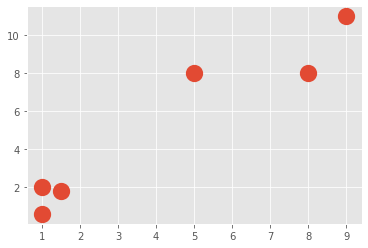

In [44]:
#custom KMeans
X = np.array([[1,2],
            [1.5,1.8],
            [5,8],
            [8,8],
            [1,0.6],
            [9,11]])
plt.scatter(X[:,0], X[:,1], s=150, linewidths=5)
colors = ["g", "r", "b", "k", "c", "o"]

In [45]:
class K_Means:
  def __init__(self, k=2, tol=0.001, max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    
  def fit(self, data):
    self.centroids = {}
    for i in range(self.k):
      self.centroids[i] = data[i]
      
    for i in range(self.max_iter):
      self.classifications = {}
      
      for i in range(self.k):
        self.classifications[i] = []
        
      for featureset in data:
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)
          
      prev_centroids = dict(self.centroids)
        
      for classification in self.classifications:
        #pass
        self.centroids[classification] = np.average(self.classifications[classification], axis=0)
  
  def predict(self, data):
    distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
    classification = distances.index(min(distances))
    return classification


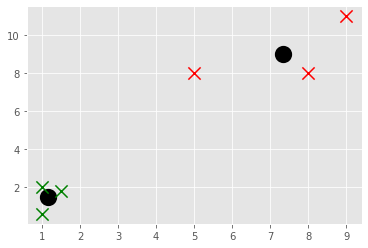

In [46]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
  plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
             marker="o", color="k", s=150, linewidths=5)
  
for classification in clf.classifications:
  color = colors[classification]
  for featureset in clf.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()